### Data Dictionary

- Player_Name: Name of the player
- Club: Club in which the player plays
- Position: Position in which the player plays
- Goals_Scored: Number of goals scored by the player in the previous season
- Assists: Number of passes made by the player leading to goals in the previous season
- Total_Points: Total number of fantasy points scored by the player in the previous season
- Minutes: Number of minutes played by the player in the previous season
- Goals_Conceded: Number of goals conceded by the player in the previous season
- Creativity: A score, computed using a range of stats, that assesses player performance in terms of producing goalscoring opportunities for other players
- Influence: A score, computed using a range of stats, that evaluates a player's impact on a match, taking into account actions that could directly or indirectly affect the match outcome
- Threat: A score, computed using a range of stats, that gauges players who are most likely to score goals
- Bonus: Total bonus points received (The three best performing players in each match receive additional bonus points based on a score computed using a range of stats. 3 points are awarded to the highest scoring player, 2 to the second best, and 1 to the third.)
- Clean_Sheets: Number of matches without conceding a goal in the previous season

## Let's start coding!

### Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("fpl_data.csv")

In [3]:
data.shape

(476, 13)

* The dataset has 476 rows and 13 columns.

In [4]:
# viewing 10 random rows of the data
data.sample(10, random_state=1)

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
441,Mark Noble,West Ham United,Midfielder,0,0,27,701,15,88.6,80.4,7,0,0
363,Sean Longstaff,Newcastle United,Midfielder,0,1,41,1405,26,182.8,179.2,148,1,2
31,Anwar El Ghazi,Aston Villa,Midfielder,10,0,111,1604,22,426.1,500.4,726,13,5
132,Olivier Giroud,Chelsea,Forward,4,0,47,740,5,112.0,161.4,403,6,4
90,Chris Wood,Burnley,Forward,12,3,138,2741,43,323.2,595.8,1129,16,9
249,Vontae Daley-Campbell,Leicester City,Defender,0,0,0,0,0,0.0,0.0,0,0,0
65,Danny Welbeck,Brighton and Hove Albion,Forward,6,4,89,1541,18,269.7,319.8,595,15,6
445,Ryan Fredericks,West Ham United,Defender,1,1,28,564,9,166.8,155.2,96,0,1
117,Christian Pulisic,Chelsea,Midfielder,4,3,82,1731,21,378.8,361.4,724,3,7
415,Ryan Sessegnon,Tottenham Hotspurs,Defender,0,0,0,0,0,0.0,0.0,0,0,0


**Observations**

- The data has players from various clubs.
- There seem to be a lot of player splaying in the midfield.
- Some players have played less or zero minutes in the previous season, and so, they have scored few or zero fantasy points respectively.

In [5]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

In [6]:
# checking datatypes and number of non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player_Name     476 non-null    object 
 1   Club            476 non-null    object 
 2   Position        476 non-null    object 
 3   Goals_Scored    476 non-null    int64  
 4   Assists         476 non-null    int64  
 5   Total_Points    476 non-null    int64  
 6   Minutes         476 non-null    int64  
 7   Goals_Conceded  476 non-null    int64  
 8   Creativity      476 non-null    float64
 9   Influence       476 non-null    float64
 10  Threat          476 non-null    int64  
 11  Bonus           476 non-null    int64  
 12  Clean_Sheets    476 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 48.5+ KB


- `Player_Name`, `Club`, and `Position` are categorical variables.
- All the other columns in the data are numeric in nature.

In [7]:
# checking for duplicate values
df.duplicated().sum()

0

- There are no duplicate values in the data.

In [8]:
# checking for missing values
df.isnull().sum()

Player_Name       0
Club              0
Position          0
Goals_Scored      0
Assists           0
Total_Points      0
Minutes           0
Goals_Conceded    0
Creativity        0
Influence         0
Threat            0
Bonus             0
Clean_Sheets      0
dtype: int64

- There are no missing values in the data.

## Exploratory Data Analysis

**Let's check the statistical summary of the data.**

In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Player_Name,476,476,Marcus Rashford,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Club,476,17,Crystal Palace,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Position,476,4,Midfielder,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Goals_Scored,476,NaN,NaN,NaN,1.90756,3.45556,0,0,0.5,2,23
Assists,476,NaN,NaN,NaN,1.7521,2.70856,0,0,0,2,14
Total_Points,476,NaN,NaN,NaN,58.5168,51.2936,0,10,48,94.25,244
Minutes,476,NaN,NaN,NaN,1336.91,1073.77,0,268.75,1269.5,2256.25,3420
Goals_Conceded,476,NaN,NaN,NaN,19.1576,15.9462,0,4,18,31,68
Creativity,476,NaN,NaN,NaN,195.976,251.479,0,8.3,96.95,296.95,1414.9
Influence,476,NaN,NaN,NaN,294.618,267.78,0,46.5,233.1,499.5,1318.2


**Observations**

- There are players from 17 clubs in the data.
- Most of the players in the data play in midfield.
- The average number of minutes played is ~1350.
- Players scored an average of ~60 fantasy points in the previous season.
- More than 50% of the players in the data have scored 1 or no goals.
- 50% of the players in the data have assisted no goals.

### Univariate analysis

In [10]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

**`Goals_Scored`**

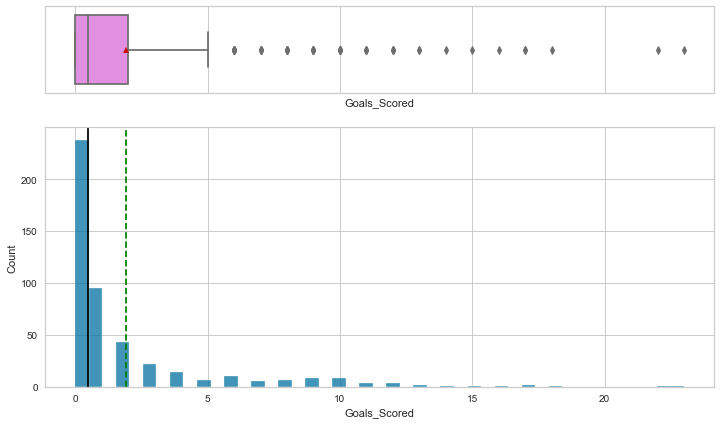

In [11]:
histogram_boxplot(df, 'Goals_Scored')

- The distribution is right-skewed and very few players have scored more than 15 goals.

**`Assists`**

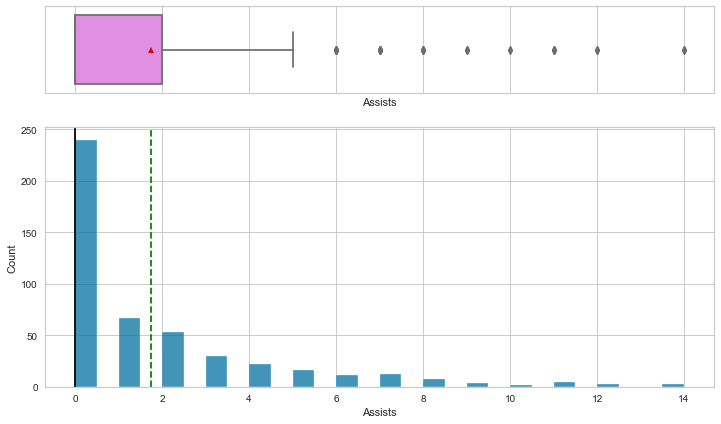

In [12]:
histogram_boxplot(df, 'Assists')

- The distribution is right-skewed and very few players have assisted more than 8 goals.

**`Goals_Conceded`**

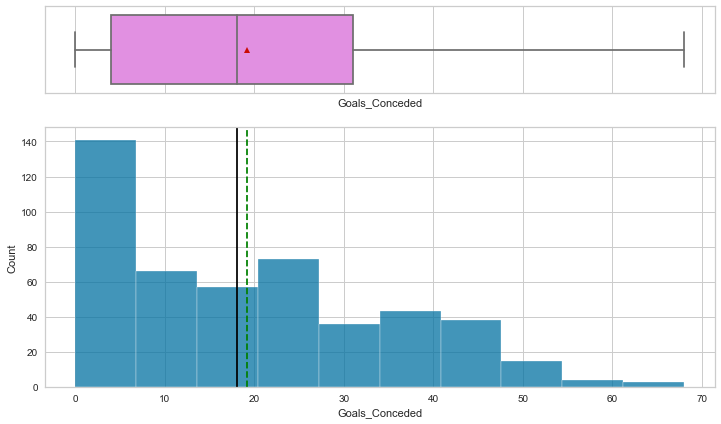

In [13]:
histogram_boxplot(df, 'Goals_Conceded')

- The distribution is slightly right-skewed and ~50% of the players have conceded 20 or less goals.

**`Clean_Sheets`**

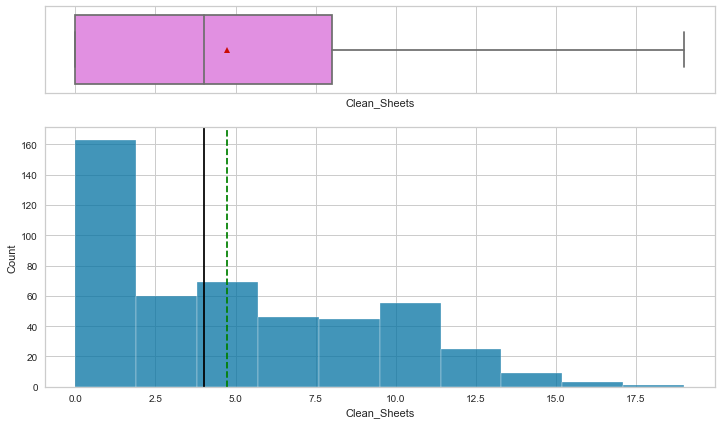

In [14]:
histogram_boxplot(df, 'Clean_Sheets')

- The distribution is slightly right-skewed and 50% of the players have kept 4 or less clean sheets.

**`Minutes`**

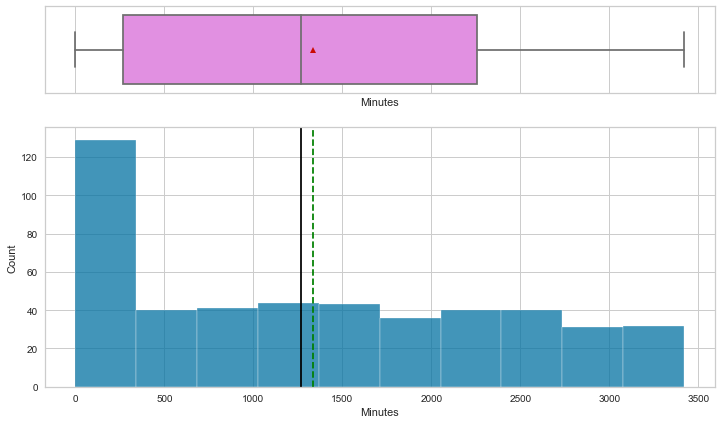

In [15]:
histogram_boxplot(df, 'Minutes')

- The distribution looks close to uniform and 50% of the players have played ~1250 or more minutes.
- Many players did not play even a single minute of football last season.

**`Total_Points`**

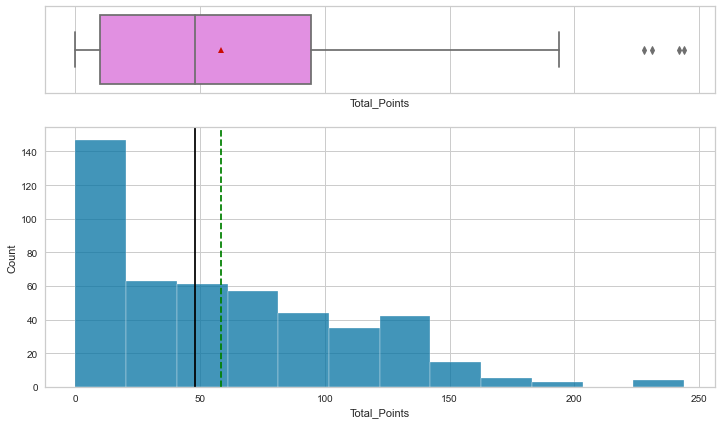

In [16]:
histogram_boxplot(df, 'Total_Points')

- The distribution is right-skewed and more than 50% of the players have scored more than 50 fantasy points.
- Many players scored no fantasy points last season.
- There are a few outliers, suggesting that these players scored a lot more fantasy points than the others.

**`Creativity`**

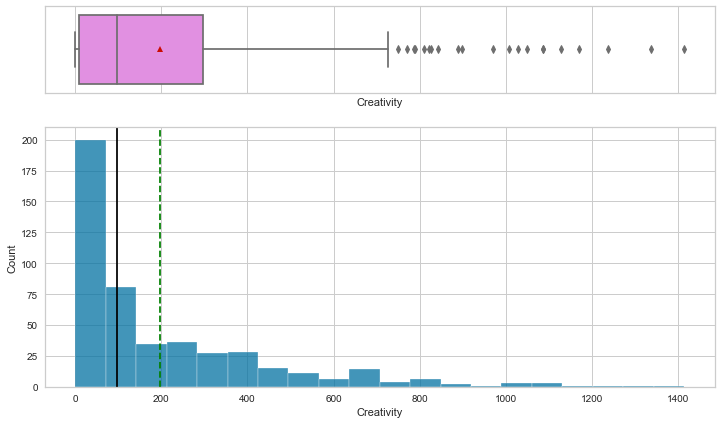

In [17]:
histogram_boxplot(df, 'Creativity')

- The distribution is right-skewed and few players have a creativity score of more than 500.

**`Influence`**

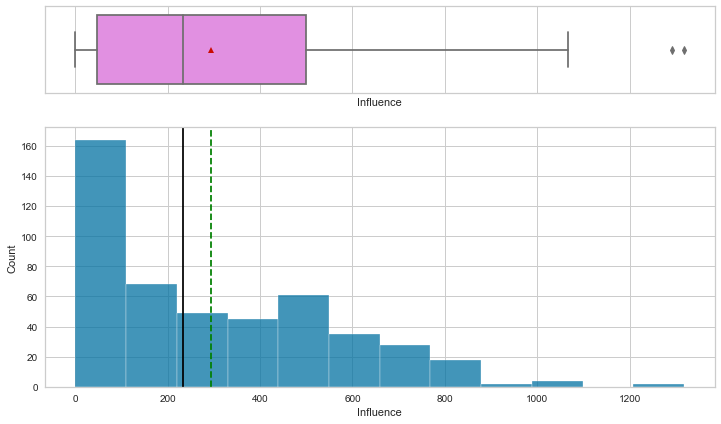

In [18]:
histogram_boxplot(df, 'Influence')

- The distribution is right-skewed and few players have a influence score of more than 800.

**`Threat`**

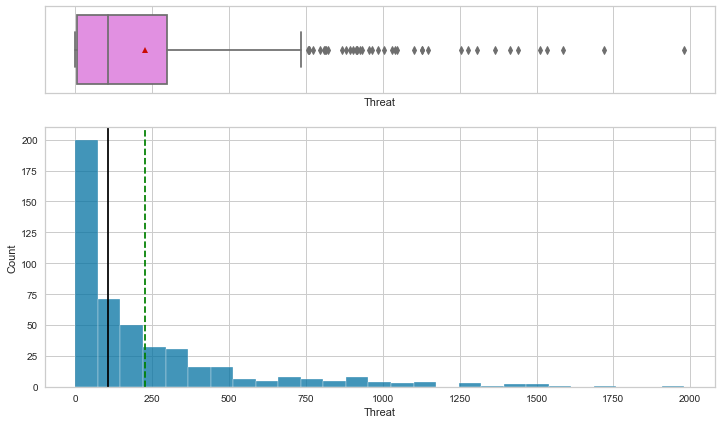

In [19]:
histogram_boxplot(df, 'Threat')

- The distribution is right-skewed and few players have a threat score of more than 500.

**`Bonus`**

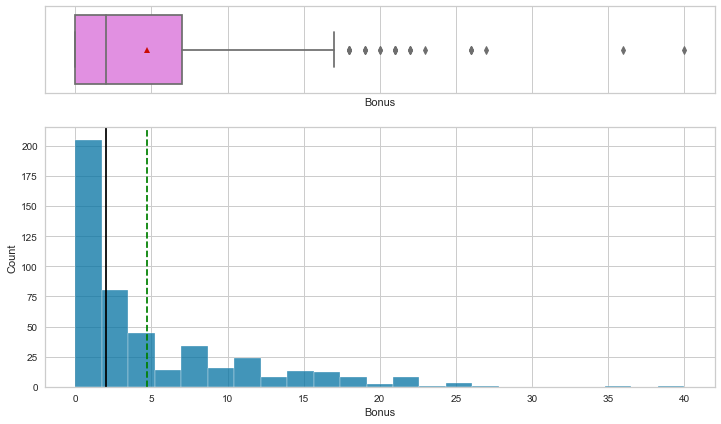

In [20]:
histogram_boxplot(df, 'Bonus')

- The distribution is right-skewed and very few players received more than 20 bonus fantasy points last season.

In [21]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**`Club`**

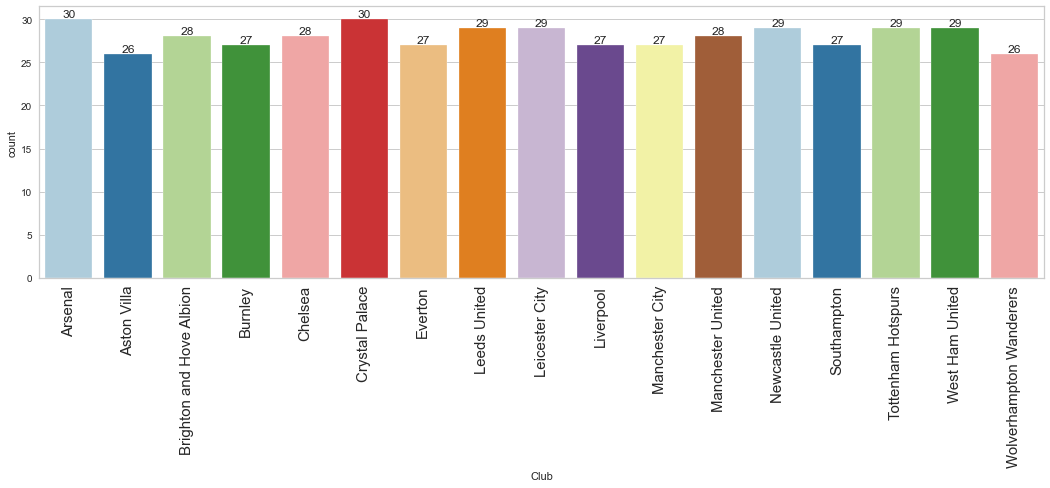

In [22]:
labeled_barplot(df, 'Club')

- The number of players in each club is almost uniformly distributed.
- All the clubs have at least 26 players.

**`Position`**

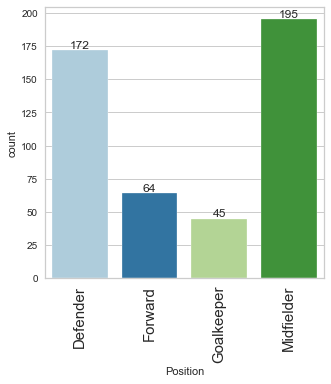

In [23]:
labeled_barplot(df, 'Position')

- The number of midfielders in the data is more than 4 times the number of goalkeepers.
    - This makes sense as a team can only play one goalkeeper in a match, so it doesn't make sense to have too many goalkeepers in the squad.
- The number of defenders in the data is nearly 3 times the number of forwards.
    - This has more to do with the formation in which the teams prefer to play nowadays.
    - Most teams tend to have 1 or 2 forwards only.

### Bivariate Analysis

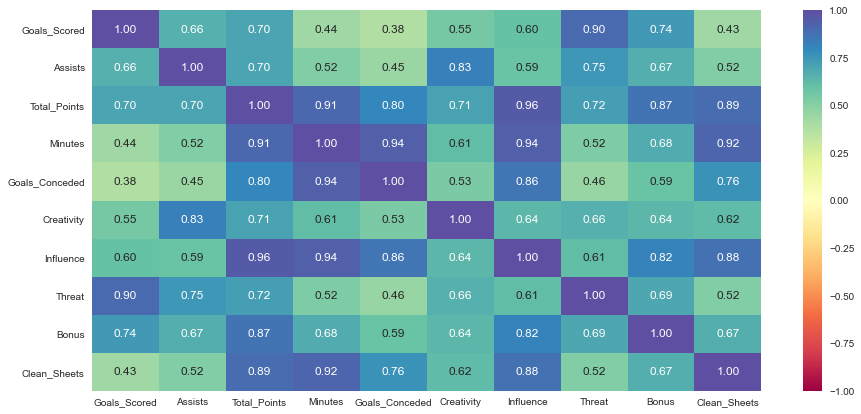

In [24]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observations**

- Many variables show high correlation with each other.

- The number of goals scored by a player and the threat score of the player is highly correlated.
    - This makes sense as the threat score gauges a player's goalscoring potential.

- Influence score is highly correlated with the total fantasy points scored and the number of minutes played by a player.
    -  This makes sense as these players have a higher impact on the game's outcome, so they tend to play for long each game and score more fantasy points.

**Let's check players from which team have scored the most fantasy points on average.**

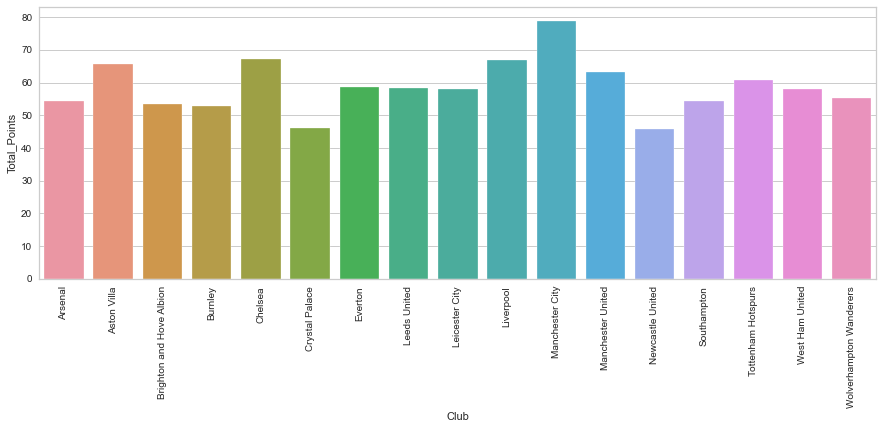

In [25]:
plt.figure(figsize=(15,5))
sns.barplot(data=df, x='Club', y='Total_Points', ci=False)
plt.xticks(rotation=90)
plt.show()

- Looks like it is favorable to keep players from Manchester City in a fantasy team as they tend to score more fantasy points on average.

**We know that players in different positions have specific roles to play in a team. Let's check players in which positions tend to score more fantasy points on average.**

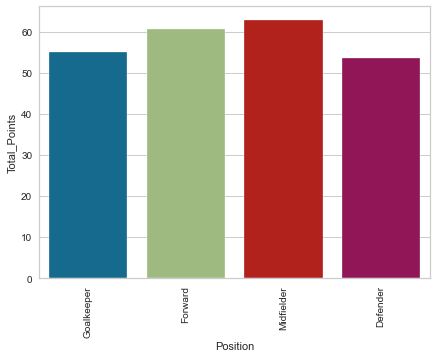

In [26]:
plt.figure(figsize=(7,5))
sns.barplot(data=df, x='Position', y='Total_Points', ci=False)
plt.xticks(rotation=90)
plt.show()

- Midfielders tend to fetch the most number of points for fantasy managers on average.

**To effectively utilize their squad depth, managers often rotate the squad to keep key players in shape for tougher games. Let's check the total number of minutes played, on average, across different positions.**

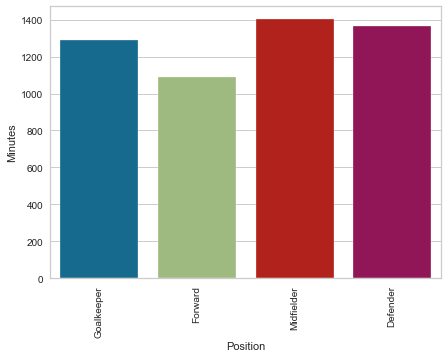

In [27]:
plt.figure(figsize=(7,5))
sns.barplot(data=df, x='Position', y='Minutes', ci=False)
plt.xticks(rotation=90)
plt.show()

- Players in the midfield and defense tend to play more minutes on average than forwards and goalkeepers.

**Every point counts in fantasy sports and getting bonus points for a player is always a treat. Let's check which team's players have secured the most bonus points, on average, last season.**

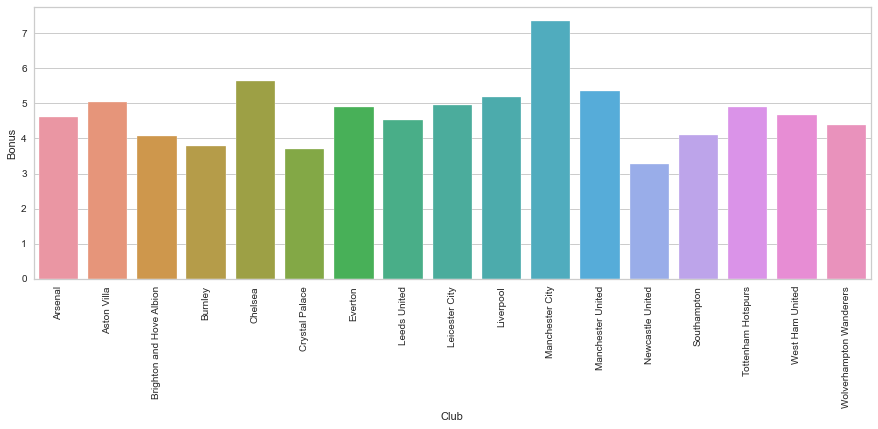

In [28]:
plt.figure(figsize=(15,5))
sns.barplot(data=df, x='Club', y='Bonus', ci=False)
plt.xticks(rotation=90)
plt.show()

- It's Manchester City again! The players of this club seem to be great fantasy picks.

**Let's see which players scored the most fantasy points last season for different positions of play.**

In [29]:
pos_list = df.Position.unique().tolist()
best_df = pd.DataFrame()

for pos in pos_list:
    df_aux = df[df.Position == pos]
    best_df = best_df.append(df_aux[df_aux.Total_Points == df_aux.Total_Points.max()][['Player_Name', 'Club', 'Position', 'Total_Points']])

best_df

,Player_Name,Club,Position,Total_Points
36,Emiliano Martinez,Aston Villa,Goalkeeper,186
403,Harry Kane,Tottenham Hotspurs,Forward,242
315,Bruno Fernandes,Manchester United,Midfielder,244
223,Stuart Dallas,Leeds United,Defender,171


- No Manchester City players here! That's surprising.

**Let's see the top 10 players with the most fantasy points last season for different positions of play.**

In [30]:
best10_df = pd.DataFrame()

for pos in pos_list:
    df_aux = df[df.Position == pos]
    best10_df = best10_df.append(df_aux.sort_values('Total_Points', ascending=False).reset_index(drop=True).loc[:10, ['Player_Name', 'Club', 'Position', 'Total_Points']])

best10_df

,Player_Name,Club,Position,Total_Points
0,Emiliano Martinez,Aston Villa,Goalkeeper,186
1,Ederson Moares,Manchester City,Goalkeeper,160
2,Illan Meslier,Leeds United,Goalkeeper,154
3,Hugo Lloris,Tottenham Hotspurs,Goalkeeper,149
4,Nick Pope,Burnley,Goalkeeper,144
5,Alisson Becker,Liverpool,Goalkeeper,140
6,Edouard Mendy,Chelsea,Goalkeeper,140
7,Lukasz Fabianski,West Ham United,Goalkeeper,133
8,Rui Pedro Patricio,Wolverhampton Wanderers,Goalkeeper,132
9,Bernd Leno,Arsenal,Goalkeeper,131


**Let's see the distribution of teams now.**

In [31]:
best10_df.Club.value_counts()

Liverpool                   6
Manchester City             6
Leeds United                4
Southampton                 3
Tottenham Hotspurs          3
Aston Villa                 3
Chelsea                     3
Manchester United           3
West Ham United             3
Arsenal                     2
Leicester City              2
Burnley                     2
Wolverhampton Wanderers     1
Brighton and Hove Albion    1
Newcastle United            1
Everton                     1
Name: Club, dtype: int64

- Most of the top 10 players across different positions are from Manchester City and Liverpool.

### Outlier Check

- Let's plot the boxplots of all numerical columns to check for outliers.

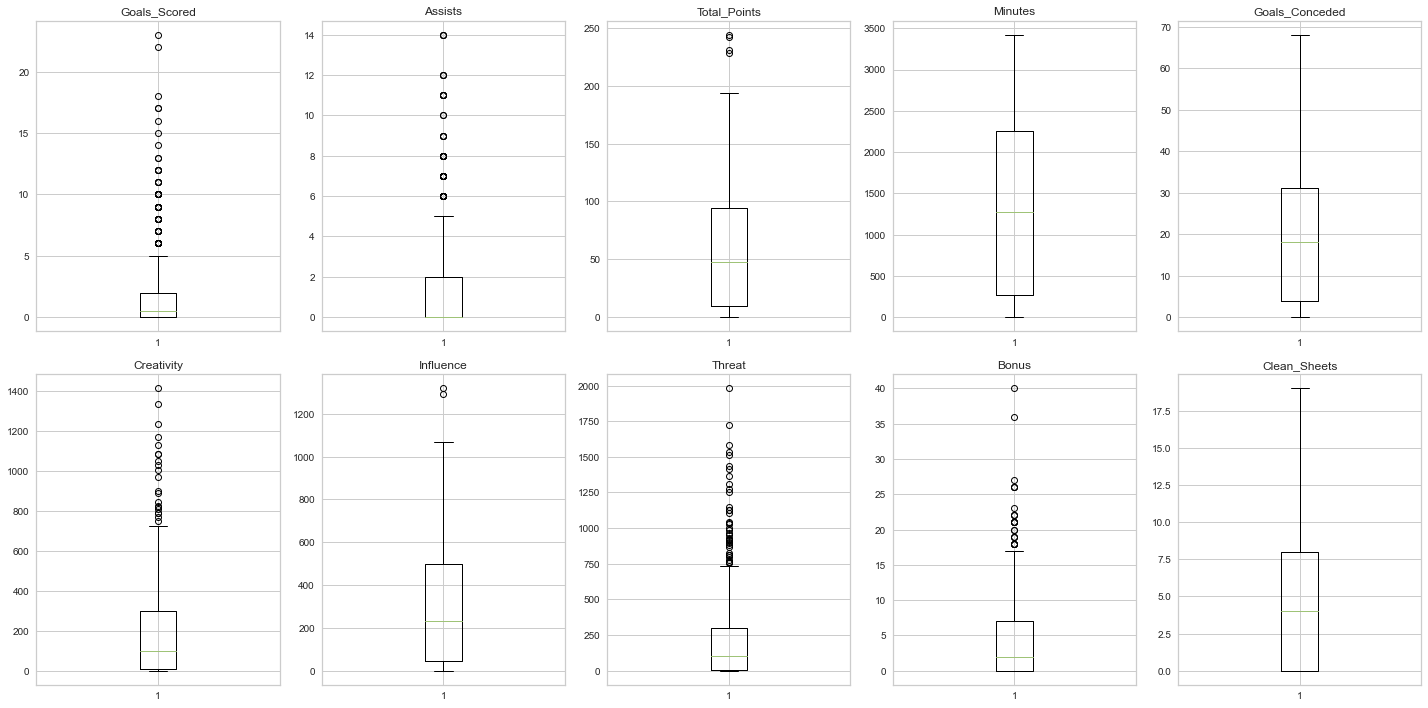

In [32]:
plt.figure(figsize=(20, 10))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(2, 5, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- There are some outliers in the data.
- We will not treat them as they are proper values.

### Scaling

- Let's scale the data before we proceed with clustering.

In [33]:
# scaling the data before clustering
scaler = StandardScaler()
subset = df.iloc[:, 3:].copy()
subset_scaled = scaler.fit_transform(subset)

In [34]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## K-means Clustering

In [35]:
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.773037110097803
Number of Clusters: 2 	Average Distortion: 1.863573678589827
Number of Clusters: 3 	Average Distortion: 1.5612774038101604
Number of Clusters: 4 	Average Distortion: 1.3542782238901416
Number of Clusters: 5 	Average Distortion: 1.2931541699741689
Number of Clusters: 6 	Average Distortion: 1.225849543585495
Number of Clusters: 7 	Average Distortion: 1.16048401421345
Number of Clusters: 8 	Average Distortion: 1.109804758457438
Number of Clusters: 9 	Average Distortion: 1.0797310475776052
Number of Clusters: 10 	Average Distortion: 1.017436992641063
Number of Clusters: 11 	Average Distortion: 1.020874702026782
Number of Clusters: 12 	Average Distortion: 0.9850734409030882
Number of Clusters: 13 	Average Distortion: 0.9602766985773118
Number of Clusters: 14 	Average Distortion: 0.9413187781558084


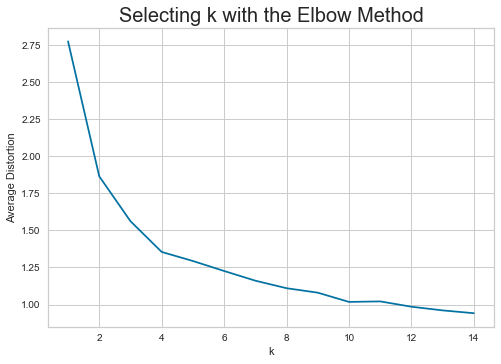

In [36]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

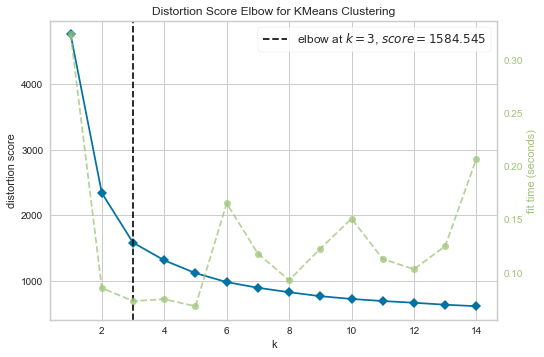

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

**Let's check the silhouette scores.**

For n_clusters = 2, the silhouette score is 0.48460299127690776)
For n_clusters = 3, the silhouette score is 0.4657385712264915)
For n_clusters = 4, the silhouette score is 0.4041321364385184)
For n_clusters = 5, the silhouette score is 0.41063881943698827)
For n_clusters = 6, the silhouette score is 0.41463610535548745)
For n_clusters = 7, the silhouette score is 0.3826908324316974)
For n_clusters = 8, the silhouette score is 0.3750329965069644)
For n_clusters = 9, the silhouette score is 0.3763672451125451)
For n_clusters = 10, the silhouette score is 0.3366262890546727)
For n_clusters = 11, the silhouette score is 0.3631675440508552)
For n_clusters = 12, the silhouette score is 0.3310947966019251)
For n_clusters = 13, the silhouette score is 0.3371354834021906)
For n_clusters = 14, the silhouette score is 0.3331138792029164)


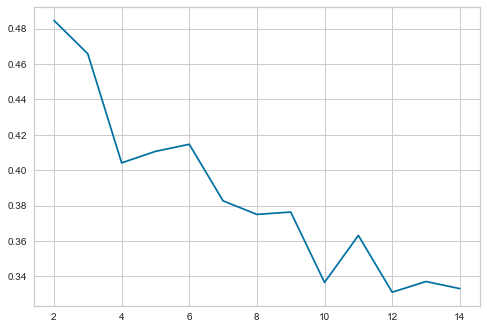

In [38]:
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

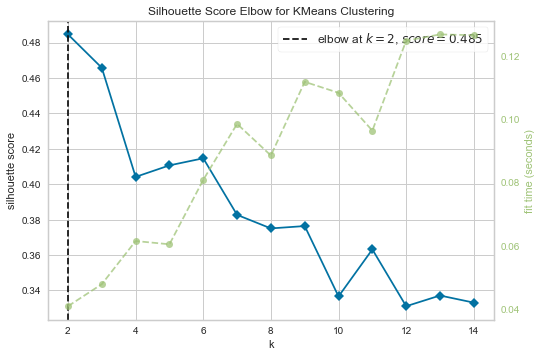

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [39]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

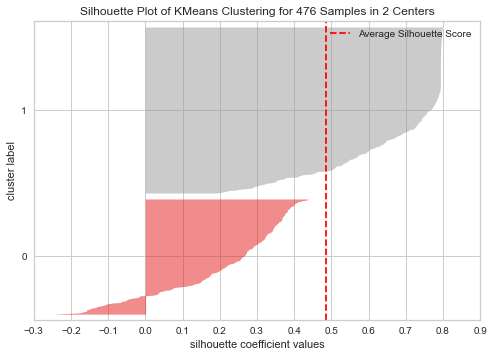

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 476 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [40]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

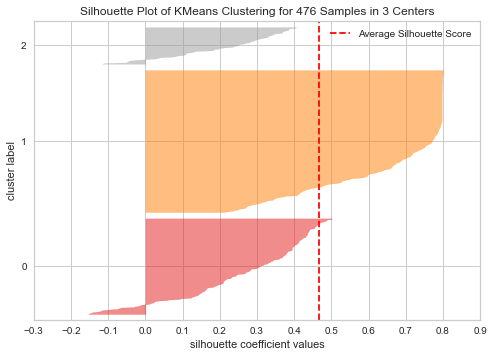

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 476 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [41]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

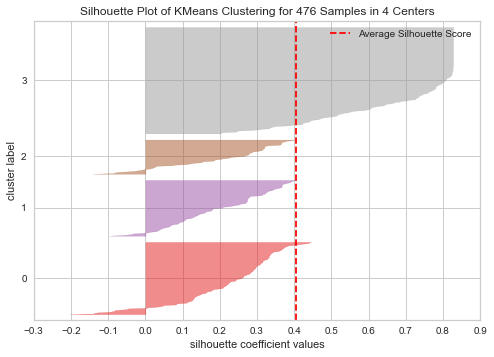

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 476 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [42]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

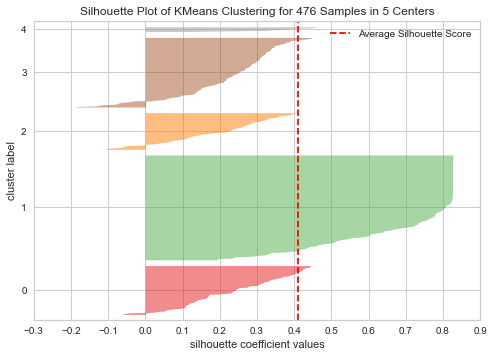

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 476 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [43]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

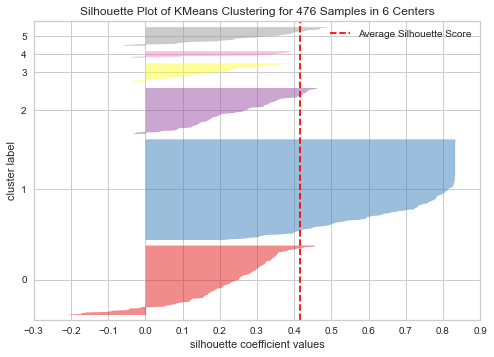

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 476 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [44]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

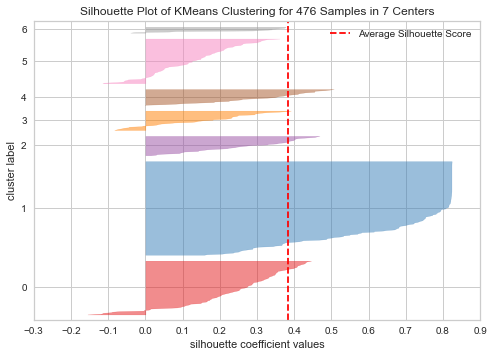

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 476 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [45]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

**Observations**

- It seems that we get a similar pattern for the clusters for k=4 to k=7
    - one large cluster with a silhouette score much higher than average, and
    - rest of the clusters have similar density and close to average silhouette score)

**We will move ahead with k=4.**

In [46]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(k_means_df)

KMeans(n_clusters=4, random_state=1)

In [47]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

### Cluster Profiles

In [48]:
km_cluster_profile = df1.groupby("KM_segments").mean()

In [49]:
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["Total_Points"].count().values
)

In [50]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count_in_each_segment
KM_segments,,,,,,,,,,,
0,1.460938,1.601562,55.648438,1389.453125,20.554688,187.653125,270.037500,218.117188,3.312500,4.687500,128
1,1.363636,1.878788,103.525253,2670.555556,37.525253,265.671717,579.185859,199.636364,7.676768,10.020202,99
2,9.147541,6.639344,141.557377,2446.704918,33.344262,617.495082,659.324590,880.540984,16.147541,9.213115,61
3,0.148936,0.202128,9.824468,238.750000,3.930851,28.171809,43.164894,30.244681,0.409574,0.558511,188


In [51]:
# let's see the names of the players in each cluster
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following players are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Player_Name"].unique())
    print()

In cluster 3, the following players are present:
['Alex Runnarsson' 'Cedric Soares' 'Edward Nketiah'
 'Gabriel Teodoro Martinelli Silva' 'Matt Macey' 'Miguel Azeez'
 'Pablo Mari' 'Reiss Nelson' 'Sead Kolasinac' 'Shkodran Mustafi'
 'Sokratis Papastathopoulos' 'William Saliba' 'Ahmed El Mohamady'
 'Carney Chukwuemeka' 'Conor Hourihane' 'Henri Lansbury' 'Jacob Ramsey'
 'Jaden Philogene-Bidace' 'Jose Peleteiro Romallo' 'Keinan Davis'
 'Kortney Hause' 'Marvelous Nakamba' 'Morgan Sanson' 'Orjan Nyland'
 'Wesley Moraes' 'Alireza Jahanbakhsh' 'Andi Zeqiri'
 'Bernardo Fernandes da Silva Junior' 'Davy Propper' 'Jakub Moder'
 'Jason Steele' 'Jayson Molumby' 'Jose Izquierdo' 'Percy Tau'
 'Reda Khadra' 'Anthony Driscoll-Glennon' 'Bailey Peacock-Farrell'
 'Dale Stephens' 'Jimmy Dunne' 'Joel Mumbongo' 'Josh Benson' 'Kevin Long'
 'Lewis Richardson' 'Phil Bardsley' 'Will Norris' 'Billy Gilmour'
 'Emerson Palmieri dos Santos' 'Faustino Anjorin' 'Fikayo Tomori'
 'Karlo Ziger' 'Kepa Arrizabalaga' 'Valenti

In [52]:
df1.groupby(["KM_segments", "Position"])['Player_Name'].count()

KM_segments  Position  
0            Defender      47
             Forward       16
             Goalkeeper     3
             Midfielder    62
1            Defender      50
             Goalkeeper    17
             Midfielder    32
2            Defender       5
             Forward       20
             Midfielder    36
3            Defender      70
             Forward       28
             Goalkeeper    25
             Midfielder    65
Name: Player_Name, dtype: int64

- Cluster 1 has no forwards, so it is likely to have players with more defensive duties in the team.
- Cluster 2 has no goalkeepers, so it is likely to have players with more offensive duties in the team.

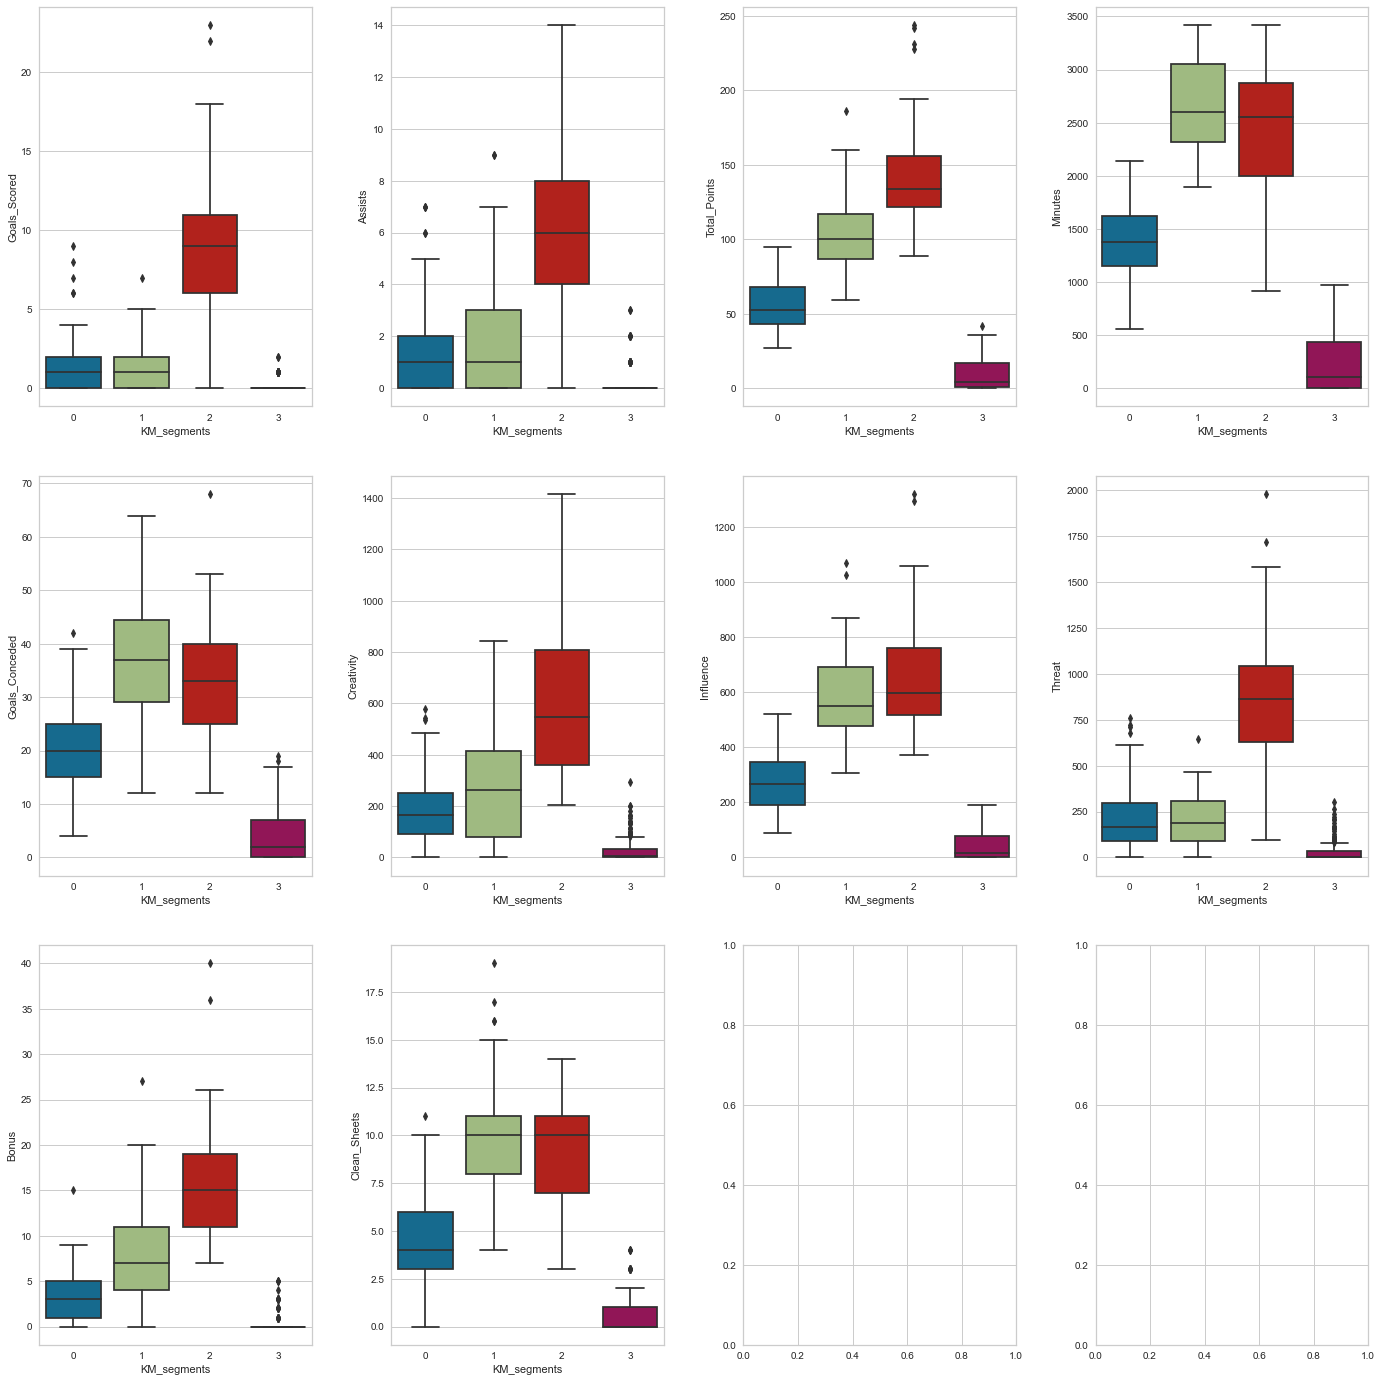

In [53]:
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 10:
            sns.boxplot(
                ax=axes[ii][jj],
                data=df1,
                y=df1.columns[3+counter],
                x="KM_segments",
            )
            counter = counter + 1

fig.tight_layout(pad=3.0)

### Insights

- **Cluster 0**
    - There are 128 players in this cluster.
    - Most of the players in this cluster have a few goals and assists, and the total fantasy points scored in the previous season are low.
    - Most of the players in this cluster had a moderate game time, a low creativity score, a low influence score, and a moderate threat score.
    - Most of the players in this cluster received low bonus points.


- **Cluster 1**
    - There are 99 players in this cluster.
    - Most of the players in this cluster have a few goals and assists, and the total fantasy points scored in the previous season are moderate.
    - Most of the players in this cluster had a high game time, a moderate creativity score, a high influence score, and a moderate threat score.
    - Most of the players in this cluster received moderate bonus points.


- **Cluster 2**
    - There are 61 players in this cluster.
    - Most of the players in this cluster have a lots of goals and assists, and the total fantasy points scored in the previous season are high.
    - Most of the players in this cluster had a high game time, a high creativity, influence, and scores.
    - Most of the players in this cluster received high bonus points.


- **Cluster 3**
    - There are 188 players in this cluster.
    - Players in this cluster, except a few, have no goals and assists, and did not score any fantasy points scored in the previous season.
    - Most of the players in this cluster had a low game time, and low creativity, influence, and threat scores.
    - Players in this cluster, except a few, received no bonus points.

# Hierarchical Clustering

In [54]:
hc_df = subset_scaled_df.copy()

In [55]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm
            
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.8430175514228705.
Cophenetic correlation for Euclidean distance and complete linkage is 0.741204129226176.
Cophenetic correlation for Euclidean distance and average linkage is 0.8476499945585418.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.862458135106748.
Cophenetic correlation for Chebyshev distance and single linkage is 0.8397660913391951.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8083029497725449.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8590072179300738.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8367206550474544.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.8065008904132246.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6583135946488972.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.7747800632434049.
Cophenetic corr

**Let's explore different linkage methods with Euclidean distance only.**

In [56]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm
        
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.8430175514228705.
Cophenetic correlation for complete linkage is 0.741204129226176.
Cophenetic correlation for average linkage is 0.8476499945585418.
Cophenetic correlation for centroid linkage is 0.8068296032280463.
Cophenetic correlation for ward linkage is 0.5777738445861551.
Cophenetic correlation for weighted linkage is 0.862458135106748.
****************************************************************************************************
Highest cophenetic correlation is 0.862458135106748, which is obtained with weighted linkage.


**We see that the cophenetic correlation is maximum with Euclidean distance and weighted linkage.**


**Let's view the dendrograms for the different linkage methods.**

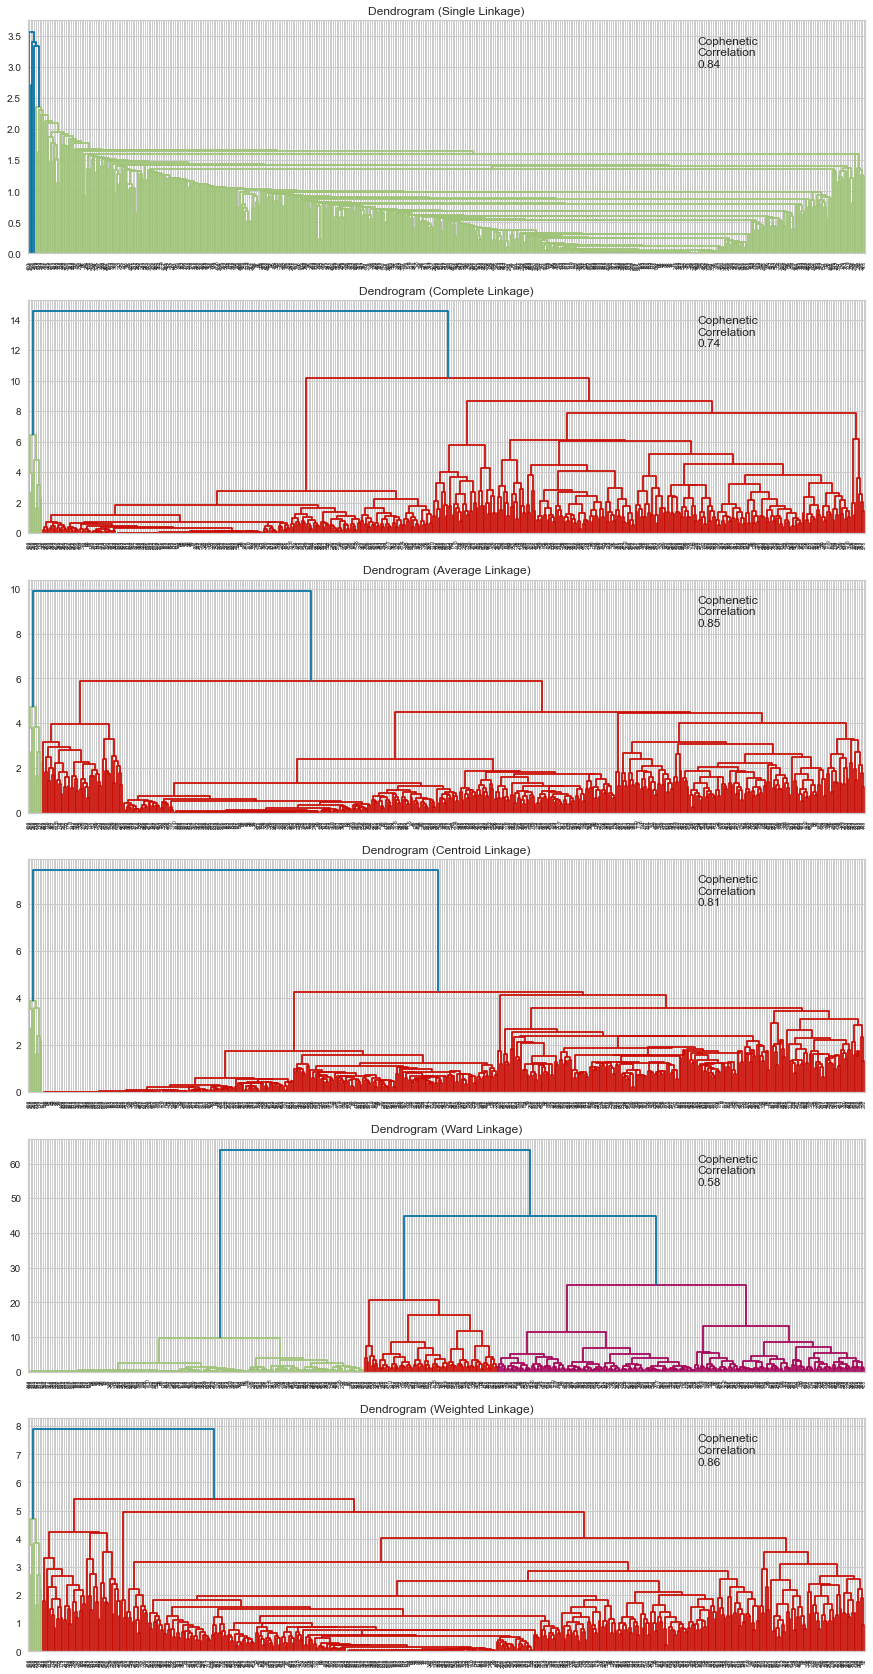

In [57]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [58]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
4,ward,0.577774
1,complete,0.741204
3,centroid,0.806830
0,single,0.843018
2,average,0.847650
5,weighted,0.862458


**Let's move ahead with 4 clusters, Euclidean distance, and average linkage as the sklearn implementation does not support weighted linkage..**

In [59]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="average")
HCmodel.fit(hc_df)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [60]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

### Cluster Profiling

In [61]:
hc_cluster_profile = df2.groupby("HC_segments").mean()

In [62]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Total_Points"].count().values
)

In [63]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count_in_each_segment
HC_segments,,,,,,,,,,,
0,0.881517,1.139810,47.969194,1205.945498,17.580569,148.574408,249.536967,131.753555,3.293839,4.182464,422
1,16.800000,9.200000,189.000000,3033.200000,44.000000,494.340000,860.720000,1591.600000,21.800000,10.800000,5
2,8.565217,5.826087,129.391304,2238.934783,29.760870,543.273913,586.234783,861.739130,14.021739,8.739130,46
3,19.333333,13.000000,238.000000,3101.000000,37.000000,1041.300000,1221.000000,1294.666667,34.000000,12.666667,3


In [64]:
# let's see the names of the players in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following players are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Player_Name"].unique())
    print()

In cluster 0, the following players are present:
['Alex Runnarsson' 'Bernd Leno' 'Calum Chambers' 'Cedric Soares'
 'Daniel Ceballos' 'David Luiz' 'Edward Nketiah' 'Emile Smith Rowe'
 'Gabriel Maghalaes' 'Gabriel Teodoro Martinelli Silva' 'Granit Xhaka'
 'Hector Bellerin' 'Kieran Tierney' 'Martin Odegaard' 'Matt Macey'
 'Miguel Azeez' 'Mohamed Naser El Sayed Elneny' 'Pablo Mari'
 'Reiss Nelson' 'Rob Holding' 'Sead Kolasinac' 'Shkodran Mustafi'
 'Sokratis Papastathopoulos' 'Thomas Partey' 'William Saliba'
 'Willian Borges Da Silva' 'Ahmed El Mohamady' 'Carney Chukwuemeka'
 'Conor Hourihane' 'Douglas Luiz Soares de Paulo' 'Emiliano Martinez'
 'Ezri Konsa Ngoyo' 'Henri Lansbury' 'Jacob Ramsey'
 'Jaden Philogene-Bidace' 'John McGinn' 'Jose Peleteiro Romallo'
 'Keinan Davis' 'Kortney Hause' 'Mahmoud Ahmed Ibrahim Hassan'
 'Marvelous Nakamba' 'Matt Targett' 'Matthew Cash' 'Morgan Sanson'
 'Orjan Nyland' 'Ross Barkley' 'Tyrone Mings' 'Wesley Moraes'
 'Aaron Connolly' 'Adam Lallana' 'Adam Webst

In [65]:
df2.groupby(["HC_segments", "Position"])['Player_Name'].count()

HC_segments  Position  
0            Defender      171
             Forward        43
             Goalkeeper     45
             Midfielder    163
1            Forward         4
             Midfielder      1
2            Defender        1
             Forward        16
             Midfielder     29
3            Forward         1
             Midfielder      2
Name: Player_Name, dtype: int64

**We see that most of the players have been grouped into one cluster, and there are two very sparse clusters. This clustering does not look good as the clusters do not have enough variability.**

**Let us try using Ward linkage as it has more distinct and separated clusters (as seen from it's dendrogram before). 4 appears to be a good number of clusters from the dendrogram for Ward linkage.**

In [66]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
HCmodel.fit(hc_df)

AgglomerativeClustering(n_clusters=4)

In [67]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

### Cluster Profiling

In [68]:
hc_cluster_profile = df2.groupby("HC_segments").mean()

In [69]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Total_Points"].count().values
)

In [70]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count_in_each_segment
HC_segments,,,,,,,,,,,
0,9.925926,6.537037,140.944444,2360.370370,31.481481,566.411111,646.914815,953.370370,15.851852,9.148148,54
1,1.482456,1.640351,54.315789,1364.087719,20.789474,185.628947,262.635088,224.508772,3.070175,4.429825,114
2,1.478632,2.102564,103.239316,2614.273504,36.470085,304.364103,570.646154,206.205128,8.136752,9.811966,117
3,0.157068,0.251309,10.324607,248.863874,4.094241,31.026702,45.018848,30.785340,0.460733,0.586387,191


In [71]:
# let's see the names of the players in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following players are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Player_Name"].unique())
    print()

In cluster 3, the following players are present:
['Alex Runnarsson' 'Calum Chambers' 'Cedric Soares' 'Edward Nketiah'
 'Martin Odegaard' 'Matt Macey' 'Miguel Azeez' 'Pablo Mari' 'Reiss Nelson'
 'Sead Kolasinac' 'Shkodran Mustafi' 'Sokratis Papastathopoulos'
 'William Saliba' 'Ahmed El Mohamady' 'Carney Chukwuemeka'
 'Conor Hourihane' 'Henri Lansbury' 'Jacob Ramsey'
 'Jaden Philogene-Bidace' 'Jose Peleteiro Romallo' 'Keinan Davis'
 'Kortney Hause' 'Marvelous Nakamba' 'Morgan Sanson' 'Orjan Nyland'
 'Wesley Moraes' 'Alireza Jahanbakhsh' 'Andi Zeqiri'
 'Bernardo Fernandes da Silva Junior' 'Davy Propper' 'Jakub Moder'
 'Jason Steele' 'Jayson Molumby' 'Jose Izquierdo' 'Percy Tau'
 'Reda Khadra' 'Tariq Lamptey' 'Anthony Driscoll-Glennon'
 'Bailey Peacock-Farrell' 'Dale Stephens' 'Jimmy Dunne' 'Joel Mumbongo'
 'Josh Benson' 'Kevin Long' 'Lewis Richardson' 'Phil Bardsley'
 'Will Norris' 'Billy Gilmour' 'Emerson Palmieri dos Santos'
 'Faustino Anjorin' 'Fikayo Tomori' 'Karlo Ziger' 'Kepa Arriza

In [72]:
df2.groupby(["HC_segments", "Position"])['Player_Name'].count()

HC_segments  Position  
0            Defender       1
             Forward       21
             Midfielder    32
1            Defender      38
             Forward       14
             Goalkeeper     3
             Midfielder    59
2            Defender      61
             Goalkeeper    17
             Midfielder    39
3            Defender      72
             Forward       29
             Goalkeeper    25
             Midfielder    65
Name: Player_Name, dtype: int64

- Cluster 0 has no goalkeepers, so it is likely to have players with more offensive duties in the team.
- Cluster 2 has no forwards, so it is likely to have players with more defensive duties in the team.

**The clusters look better now. Let's check the cluster profiles.**

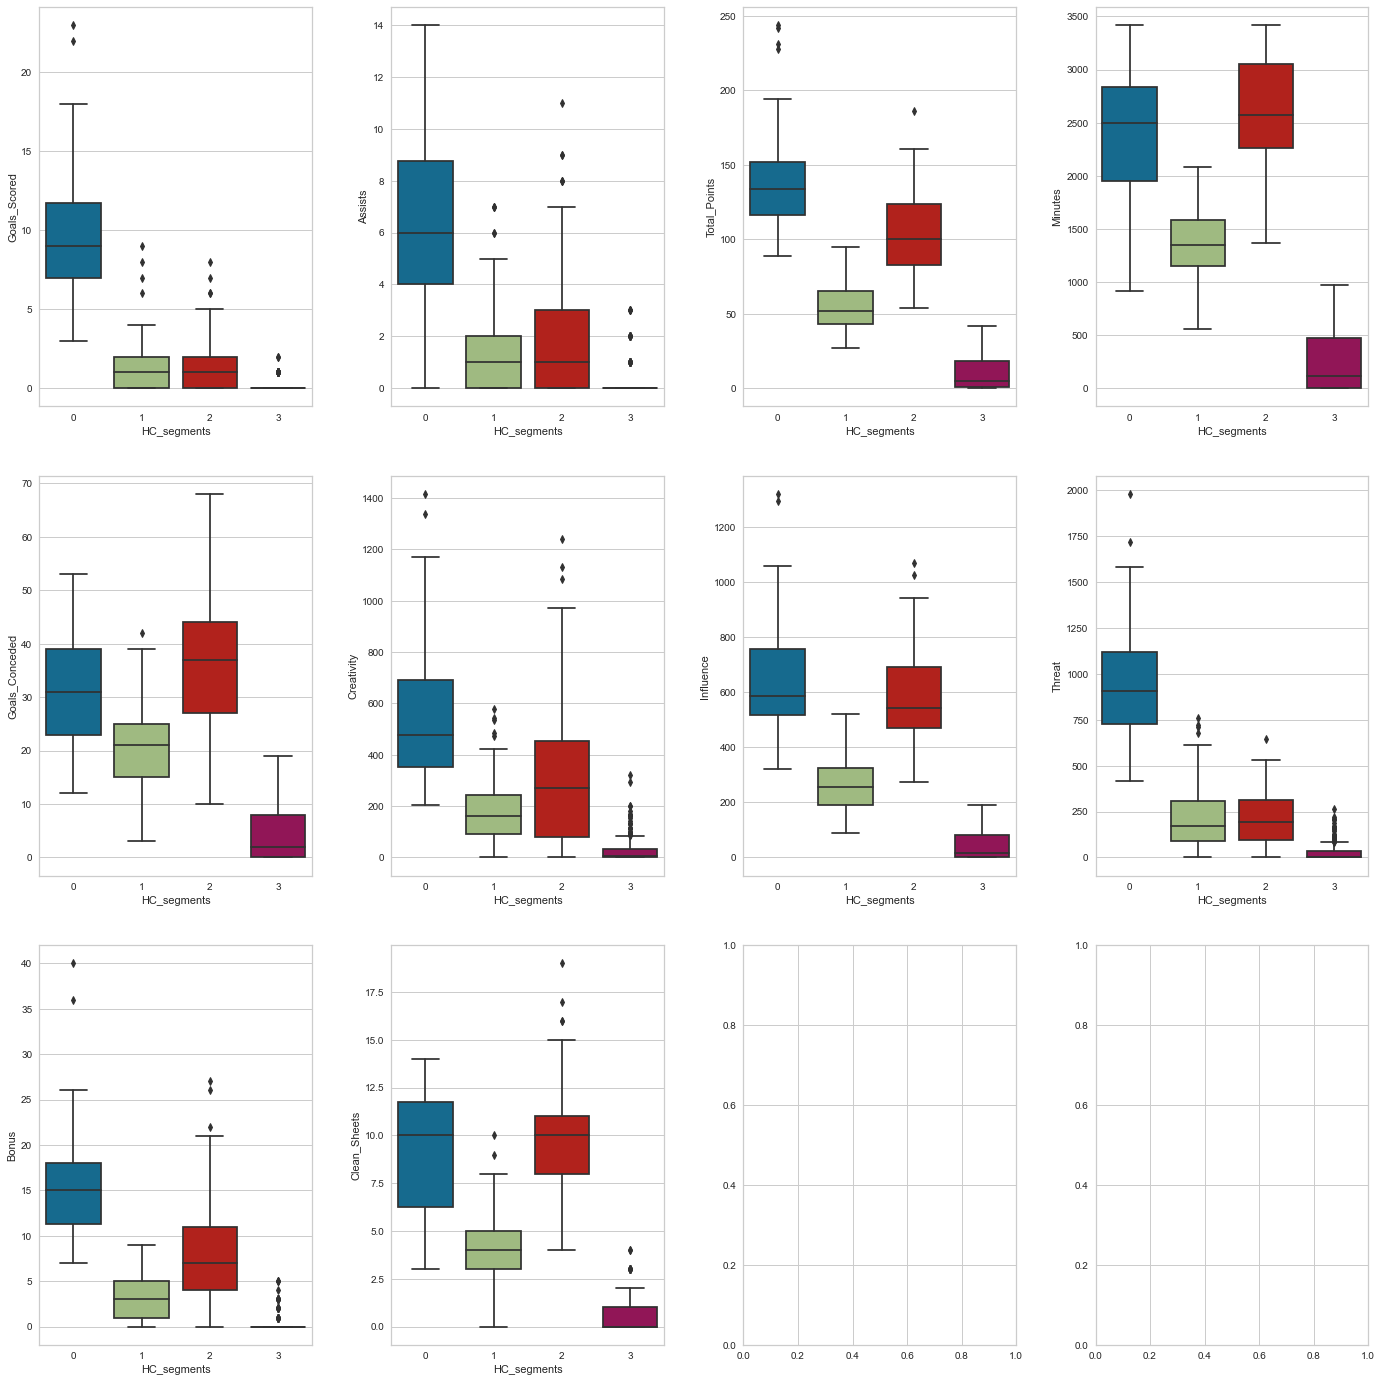

In [73]:
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 10:
            sns.boxplot(
                ax=axes[ii][jj],
                data=df2,
                y=df2.columns[3+counter],
                x="HC_segments",
            )
            counter = counter + 1

fig.tight_layout(pad=3.0)

### Insights

- **Cluster 0**
    - There are 54 players in this cluster.
    - Most of the players in this cluster have a lots of goals and assists, and the total fantasy points scored in the previous season are high.
    - Most of the players in this cluster had a high game time, a high creativity, influence, and scores.
    - Most of the players in this cluster received high bonus points.


- **Cluster 1**
    - There are 114 players in this cluster.
    - Most of the players in this cluster have a few goals and assists, and the total fantasy points scored in the previous season are low.
    - Most of the players in this cluster had a moderate game time, a low creativity score, a high influence score, and a moderate threat score.
    - Most of the players in this cluster received low bonus points.


- **Cluster 2**
    - There are 117 players in this cluster.
    - Most of the players in this cluster have a few goals and assists, and the total fantasy points scored in the previous season are moderate.
    - Most of the players in this cluster had a high game time, a moderate creativity score, a high influence score, and a moderate threat score.
    - Most of the players in this cluster received moderate bonus points.


- **Cluster 3**
    - There are 191 players in this cluster.
    - Players in this cluster, except a few, have no goals and assists, and did not score any fantasy points scored in the previous season.
    - Most of the players in this cluster had a low game time, and low creativity, influence, and threat scores.
    - Players in this cluster, except a few, received no bonus points.

## K-means vs Hierarchical Clustering

- Both K-means and Hierarchical clustering yield similar clusters, with a few players swapped between the clusters obtained using both techniques.
- The sklearn implementations of both the techniques take nearly the same amount of time to execute. However, dendrograms in Hierarchical clustering take a lot of time to render.

**Let's swap the labels for the clusters obtained using K-means so that they match their corresponding clusters obtained using Hierarchical clustering.**

In [74]:
k_means_df["KM_segments"] = k_means_df["KM_segments"].replace({0: 1, 1: 2, 2: 0})
df1["KM_segments"] = df1["KM_segments"].replace({0: 1, 1: 2, 2: 0})

km_cluster_profile = df1.groupby("KM_segments").mean()
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["Total_Points"].count().values
)

In [75]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count_in_each_segment
KM_segments,,,,,,,,,,,
0,9.147541,6.639344,141.557377,2446.704918,33.344262,617.495082,659.324590,880.540984,16.147541,9.213115,61
1,1.460938,1.601562,55.648438,1389.453125,20.554688,187.653125,270.037500,218.117188,3.312500,4.687500,128
2,1.363636,1.878788,103.525253,2670.555556,37.525253,265.671717,579.185859,199.636364,7.676768,10.020202,99
3,0.148936,0.202128,9.824468,238.750000,3.930851,28.171809,43.164894,30.244681,0.409574,0.558511,188


In [76]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count_in_each_segment
HC_segments,,,,,,,,,,,
0,9.925926,6.537037,140.944444,2360.370370,31.481481,566.411111,646.914815,953.370370,15.851852,9.148148,54
1,1.482456,1.640351,54.315789,1364.087719,20.789474,185.628947,262.635088,224.508772,3.070175,4.429825,114
2,1.478632,2.102564,103.239316,2614.273504,36.470085,304.364103,570.646154,206.205128,8.136752,9.811966,117
3,0.157068,0.251309,10.324607,248.863874,4.094241,31.026702,45.018848,30.785340,0.460733,0.586387,191


- As noted before, both the techniques give similar clusters on average.

## Actionable Insights and Recommendations

- **Cluster 0** players are the top players for fantasy. They fetch more points and have a higher chance of getting bonus points too. These players should be priced higher than the others so that it will be difficult to accommodate too many of them in the same team (because of the fixed budget) and fantasy managers have to make wise choices.


- **Cluster 1** players are players who do not play many minutes, most likely come on as substitutes, and fetch lesser fantasy points as a result. These players should be priced low and can be good differential picks.


- **Cluster 2** are the players who are influential in their team's play but do not tend to score or assist much, resulting in lesser fantasy points than the Cluster 0 players. These players should be priced somewhere between the Cluster 0 and Cluster 1 players.


- **Cluster 3** has the players who are in the squad to provide backup in case any of the starting 11 players get injured. They get lower game time and barely get any fantasy points. These players should be priced the lowest amongst the 4 clusters.


- Player performances from previous seasons should be taken into account and fantasy prices from the previous season should be referred to as a benchmark to determine the price for the upcoming season.


- OnSports should conduct cluster analysis separately for each of the playing positions to arrive at a better fantasy pricing strategy.

## Add-on: PCA for visualization

- Let's use PCA to reduce the data to two dimensions and visualize it to see how well-separated the clusters are.

In [77]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced_pca = pca.fit_transform(subset_scaled_df)

# storing results in a dataframe
reduced_data_df_pca = pd.DataFrame(data = X_reduced_pca, columns = ['Component 1', 'Component 2'])

# checking the amount of variance explained
print(f'The first two principal components explain {np.round(100*pca.explained_variance_ratio_.sum(), 2)}% of the variance in the data.')

The first two principal components explain 85.81% of the variance in the data.


<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

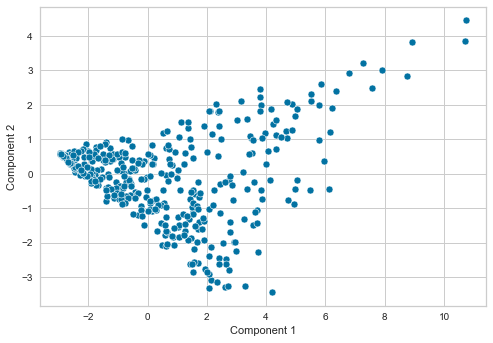

In [78]:
sns.scatterplot(data=reduced_data_df_pca, x='Component 1', y='Component 2')

<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

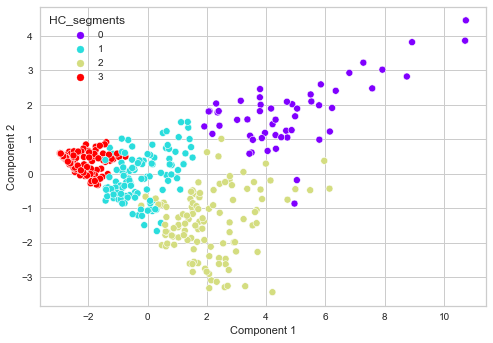

In [79]:
sns.scatterplot(data=reduced_data_df_pca, x='Component 1', y='Component 2', hue=df2["HC_segments"], palette='rainbow')

- The clusters are somewhat separated.
- Cluster 0 points are concentrated to the left of the plot and points from the rest of the clusters are slightly more spread out to the right.